In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display , clear_output

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

In [4]:
import warnings

In [5]:
movies= pd.read_csv('movies.csv')

In [6]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [9]:
movies.movieId.nunique()

10329

In [11]:
duplicate = movies[movies.title.duplicated()]

In [12]:
duplicate

,movieId,title,genres
6270,26982,Men with Guns (1997),Drama
7963,64997,War of the Worlds (2005),Action|Sci-Fi


In [13]:
movies.drop_duplicates(subset='title',keep='first',inplace=True)

In [14]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [15]:
movies.describe()

,movieId
count,10327.000000
mean,31921.558923
std,37736.960408
min,1.000000
25%,3239.000000
50%,7087.000000
75%,59875.000000
max,149532.000000


In [16]:
ratings = pd.read_csv('ratings.csv')

In [17]:
ratings

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [18]:
df1 = ['movieId','userId']

In [19]:
duplicates_df1=ratings[ratings[df1].duplicated()]

In [20]:
duplicates_df1

,userId,movieId,rating,timestamp


In [21]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [23]:
ratings.groupby(['userId'])[['rating']].count().nlargest(20,'rating').head()

,rating
userId,
668,5678
575,2837
458,2086
232,1421
310,1287


In [24]:
movie_ratings = pd.merge(ratings,movies,how='right',on='movieId')
"""on : Column or index level names to join on. These must be found in both DataFrames. 
If on is None and not merging on indexes then this defaults to the intersection of the columns in both DataFrames."""

In [25]:
movie_ratings

,userId,movieId,rating,timestamp,title,genres
0,2.0,1,5.0,8.590469e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5.0,1,4.0,1.303501e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,8.0,1,5.0,8.586109e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,11.0,1,4.0,8.508158e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,14.0,1,4.0,8.517663e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
105333,475.0,148238,3.0,1.451213e+09,A Very Murray Christmas (2015),Comedy
105334,458.0,148626,4.0,1.452015e+09,The Big Short (2015),Drama
105335,576.0,148626,4.5,1.451688e+09,The Big Short (2015),Drama
105336,668.0,148626,4.5,1.451148e+09,The Big Short (2015),Drama


In [26]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105338 entries, 0 to 105337
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105334 non-null  float64
 1   movieId    105338 non-null  int64  
 2   rating     105334 non-null  float64
 3   timestamp  105334 non-null  float64
 4   title      105338 non-null  object 
 5   genres     105338 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 4.8+ MB


In [27]:
movie_ratings.describe()

,userId,movieId,rating,timestamp
count,105334.000000,105338.000000,105334.000000,1.053340e+05
mean,364.916475,13380.968207,3.516880,1.130418e+09
std,197.487373,26171.802694,1.044878,1.802680e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711007e+08
50%,383.000000,2496.500000,3.500000,1.115042e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [29]:
movie_ratings.groupby(['title'])[['rating']].sum().nlargest(20,'rating').head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


In [27]:
movie_ratings.groupby(['title'])[['rating']].count().nlargest(20,'rating').head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


C:\Users\Puneeth G B\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Puneeth G B\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\Puneeth G B\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<Axes: ylabel='Count'>

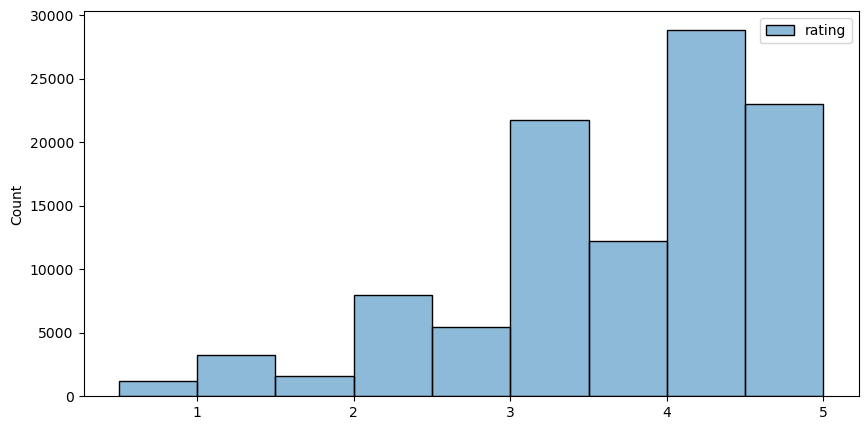

In [34]:
plt.figure(figsize=(10,5))
sns.histplot(movie_ratings[['rating']],bins=9,kde=False)

In [39]:
print("Average rating of different genres")
Genres_Rat = movie_ratings.groupby('genres')['rating'].mean().sort_values()
pd.DataFrame(Genres_Rat)

Average rating of different genres


,rating
genres,
Children|Comedy|Drama|Musical|Romance,0.5
Children|Comedy|Drama|Musical,0.5
Children|Comedy|Crime,0.5
Comedy|Documentary|Romance,0.5
Adventure|Drama|Romance|Sci-Fi|Thriller,0.5
...,...
Musical|Sci-Fi,5.0
Action|Comedy|Drama|Romance,5.0
Animation|Children|Comedy|Drama|Romance,5.0


In [41]:
print('Total number of movies for different genres')
Genres_TMovies = movie_ratings.groupby('genres')['movieId'].count().sort_values()
pd.DataFrame(Genres_TMovies)

Total number of movies for different genres


,movieId
genres,
Animation|Documentary,1
Action|Adventure|Fantasy|War,1
Action|Adventure|Horror,1
Action|Adventure|Horror|Mystery|Sci-Fi|Thriller,1
Adventure|Drama|Thriller|War,1
...,...
Comedy|Drama,3101
Drama|Romance,3407
Comedy|Romance,3733


In [42]:
userid = np.array(movie_ratings.userId.unique())
userid.sort()
userid

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [43]:
movie = np.array(movie_ratings.title.unique())
movie1 = pd.DataFrame(movie)
movie1

,0
0,Toy Story (1995)
1,Jumanji (1995)
2,Grumpier Old Men (1995)
3,Waiting to Exhale (1995)
4,Father of the Bride Part II (1995)
...,...
10322,Cosmic Scrat-tastrophe (2015)
10323,Le Grand Restaurant (1966)
10324,A Very Murray Christmas (2015)
10325,The Big Short (2015)


In [44]:
Genres = np.array(movie_ratings.genres.unique())
Genres

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Adventure|Romance|IMAX', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Children|Comedy',
       'Drama|Mystery', 'Drama|Thriller', 'Comedy|Crime',
       'Action|Sci-Fi|Thriller', 'Action|Comedy|Horror|Thriller'

In [58]:
def recommendation(g, t, N):
    ratings_summary = ratings.groupby('movieId')['rating'].agg(Rating_Total_Count='count', Average_Rating='mean').reset_index()
    movie_ratings = pd.merge(movies, ratings_summary, on='movieId')

    movie_ratings['Year'] = movie_ratings['title'].str.extract('(\(\d\d\d\d\))')
    movie_ratings['title'] = movie_ratings['title'].str.replace('(\(\d\d\d\d\))', '', regex=True).str.strip()
    #regex: describes a set of strings that matches the pattern

    genre_filtered = movie_ratings[(movie_ratings['genres'] == g) & (movie_ratings['Rating_Total_Count'] > t)]

    top_recommendations = genre_filtered[['title', 'Average_Rating', 'Rating_Total_Count']].sort_values(by='Average_Rating', ascending=False).head(N)

    print(f"Top {N} recommendations for genre '{g}' with more than {t} ratings:\n")
    return top_recommendations

In [59]:
g = str(input('Genre, provide input from "Genres" : '))
t = int(input('Minimum rating threshold : '))
N = int(input('No. of recommendations : '))


recommendation(g, t, N)

Genre, provide input from "Genres" : Action
Minimum rating threshold : 4
No. of recommendations : 5
Top 5 recommendations for genre 'Action' with more than 4 ratings:



,title,Average_Rating,Rating_Total_Count
8646,Ip Man 2,4.000000,8
3796,"Last Castle, The",3.571429,7
8941,13 Assassins (Jûsan-nin no shikaku),3.500000,5
1211,Double Team,3.222222,9
3434,Kiss of the Dragon,3.187500,16
